# Exploring Covid-19 Data

##### William Ho

In this project I'll take a look at the COVID-19 Dataset on Kaggle, available at this link:
[COVID-19 Dataset](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)

### Import the data

First make sure to install necessary packages:

In [ ]:
import sys
!{sys.executable} -m pip install -q kagglehub pandas matplotlib seaborn ipython-sql;


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Then import the required libraries and data set:

In [10]:
import kagglehub

path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

c:\Users\willr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\willr\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [11]:
import os

print("Files in dataset directory:")
print(os.listdir(path))

Files in dataset directory:
['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']


In [12]:
import pandas as pd

csv_path = os.path.join(path, "covid_19_clean_complete.csv")
df = pd.read_csv(csv_path)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Now we have an idea of what the data looks like, lets also look at all the countries included

In [13]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

### Clean and explore the data

Since this table does not contain information for `Province/State` I'll remove the column\
I'll also rename the "Country/Region" column to just "Country" for ease of use
I'll also rename "Who Region" to "Who_Region" to avoid mistakes

In [14]:
df = df.drop(columns=["Province/State"])
df.rename(columns={'Country/Region': 'Country'}, inplace=True)
df.rename(columns={'WHO Region': 'WHO_Region'}, inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Now lets explore the other columns and look for missing values

In [15]:
# Take a look at the column types as well as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     49068 non-null  object 
 1   Lat         49068 non-null  float64
 2   Long        49068 non-null  float64
 3   Date        49068 non-null  object 
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO_Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


* There are no null objects in any of the remaining columns
* `Confirmed`, `Deaths`,  `Recovered`, and `Active` are all integers, which are good for mathematical analysis
* However, `Country/Region`, `Date`, and `Who_Region` are all saved as objects, so I'll change them to more valuable types for data analysis

In [16]:
df['Date'] = pd.to_datetime(df['Date']) # Makes date into date format
df['Country'] = df['Country'].astype('category') # Makes Country into a category since we have multiple instances of each
df['WHO_Region'] = df['WHO_Region'].astype('category') # Makes Region a category since we have multiple instances of each

Next I'll use the `describe()` method to get a better idea of what the data looks like\
This should be particularly helpful in inspiring potential questions to answer using data analysis

In [17]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


* It looks like our data starts on January 22, 2020 going up until July 27, 2020
* Some countries have 0 recorded confirmed, deaths, and recovered which may be useful to remove/ignore
* On the other hand, countries had up to 148,011 deaths with 2,816,444 active cases

SQL will be particularly helpful for me to run queries on this data set\
I'll use `sqlite3` to run SQL queries in Python

In [18]:
import sqlite3, prettytable

# Include prettytable to display results
prettytable.DEFAULT = 'DEFAULT'

# Allow sql cell magic
%load_ext sql

# Make the database 'covid.db' with the table 'covid' and connect to it
con = sqlite3.connect("covid.db")
df.to_sql('covid', con, if_exists='replace', index=False)

# Use the database 'covid.db'
%sql sqlite:///covid.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Start by checking everything still works by running a simple query

In [70]:
%%sql
select *
from covid
limit 5;

 * sqlite:///covid.db
Done.


Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
Afghanistan,33.93911,67.709953,2020-01-22 00:00:00,0,0,0,0,Eastern Mediterranean
Albania,41.1533,20.1683,2020-01-22 00:00:00,0,0,0,0,Europe
Algeria,28.0339,1.6596,2020-01-22 00:00:00,0,0,0,0,Africa
Andorra,42.5063,1.5218,2020-01-22 00:00:00,0,0,0,0,Europe
Angola,-11.2027,17.8739,2020-01-22 00:00:00,0,0,0,0,Africa


`df.describe()` already gave us a pretty good understanding of this data set\
However, I'd like to take a look at which Countries and Regions had particularly high case numbers\
I'd also like to check out which countries have no records in this table and may need to be removed

In [80]:
%%sql
select
    Country,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by -- necessary to resolve all the instances where the Country is the same on the same day
    Country
order by
    total_confirmed desc,
    total_deaths desc
limit 5;

 * sqlite:///covid.db
Done.


Country,total_confirmed,total_deaths,total_recovered,total_active
US,4290259,148011,1325804,2816444
Brazil,2442375,87618,1846641,508116
India,1480073,33408,951166,495499
Russia,816680,13334,602249,201097
South Africa,452529,7067,274925,170537


In [ ]:
%%sql
select
    Country,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by -- just in case some countries have multiple entries on the same day
    Country
order by
    total_recovered desc,
    total_active desc
limit 5;

 * sqlite:///covid.db
Done.


Country,total_confirmed,total_deaths,total_recovered,total_active
Brazil,2442375,87618,1846641,508116
US,4290259,148011,1325804,2816444
India,1480073,33408,951166,495499
Russia,816680,13334,602249,201097
Chile,347923,9187,319954,18782


In [83]:
%%sql
select
    Country,
    (cast(sum(Recovered) as float) / sum(Confirmed)) as Recovery_Ratio
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    Recovery_Ratio desc
limit 5;

 * sqlite:///covid.db
Done.


Country,Recovery_Ratio
Holy See,1.0
Grenada,1.0
Dominica,1.0
Djibouti,0.9837912630954734
Iceland,0.9832793959007551


In [84]:
%%sql
select
    WHO_Region,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where
    date = '2020-07-27 00:00:00'
group by
    WHO_Region
order by
    total_confirmed desc,
    total_deaths desc;

 * sqlite:///covid.db
Done.


WHO_Region,total_confirmed,total_deaths,total_recovered,total_active
Americas,8839286,342732,4468616,4027938
Europe,3299523,211144,1993723,1094656
South-East Asia,1835297,41349,1156933,637015
Eastern Mediterranean,1490744,38339,1201400,251005
Africa,723207,12223,440645,270339
Western Pacific,292428,8249,206770,77409


In [90]:
%%sql
select
    Country,
    sum(confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
having total_confirmed < 100

 * sqlite:///covid.db
Done.


Country,total_confirmed
Antigua and Barbuda,86
Belize,48
Bhutan,99
Dominica,18
Fiji,27
Greenland,14
Grenada,23
Holy See,12
Laos,20
Liechtenstein,86


Based on this data, the US, Brazil, Russia, and India all seem to have highest case and death counts\
The Americas and Europe seem to have been hit the hardest\
Countries have as few as 10 total cases, but none have 0 all the way through the data set\
However, this data set has many possible confounding factors:
* Some countries may have reason to misreport data to make their numbers look better
* Poorer countries may not have good enough technology to track covid cases accurately
* Some countries may have not interest in keeping data on such matters\
However, many of these factors are out of my control now that the data has been collected, so let's\
move forward with this analysis!

Great, everything looks good to go so I'll work on answering a few interseting questions

### Question 1: How do countries compare in terms of total cases?

In [19]:
# I'll import matplotlib and seaborn here to aid in my analysis by providing an 
# easy way to generate visualizations
import matplotlib.pyplot as plt
import seaborn as sns

##### First I'll look at the 20 countries with the most cases:

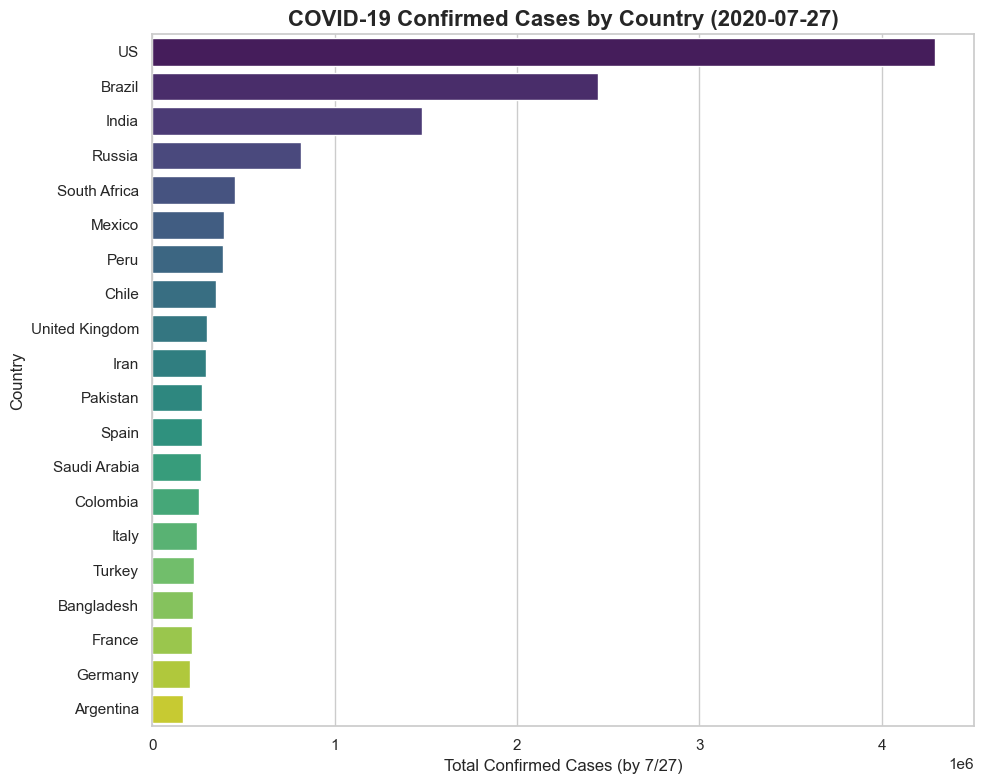

In [ ]:
#First convert a SQL query into a pd data frame
conn = sqlite3.connect("covid.db")
query = """
select
    Country,
    sum(Confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    total_confirmed desc
limit 20
"""
df = pd.read_sql(query, conn)
conn.close()

# Now graph the data
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    y="Country",               
    x="total_confirmed",
    hue="Country",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.xlabel("Total Confirmed Cases (by 7/27)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("COVID-19 Confirmed Cases by Country (2020-07-27)", fontsize=16, weight="bold")

plt.tight_layout()
plt.show()

It seems like the USs tracked many more confirmed cases than any other country, with a sharp dropoff\
between US, Brazil, India, Russia, and the rest of the countries

##### Now for the 20 countries with the fewest cases:

C:\Users\willr\AppData\Local\Temp\ipykernel_43632\3174197347.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


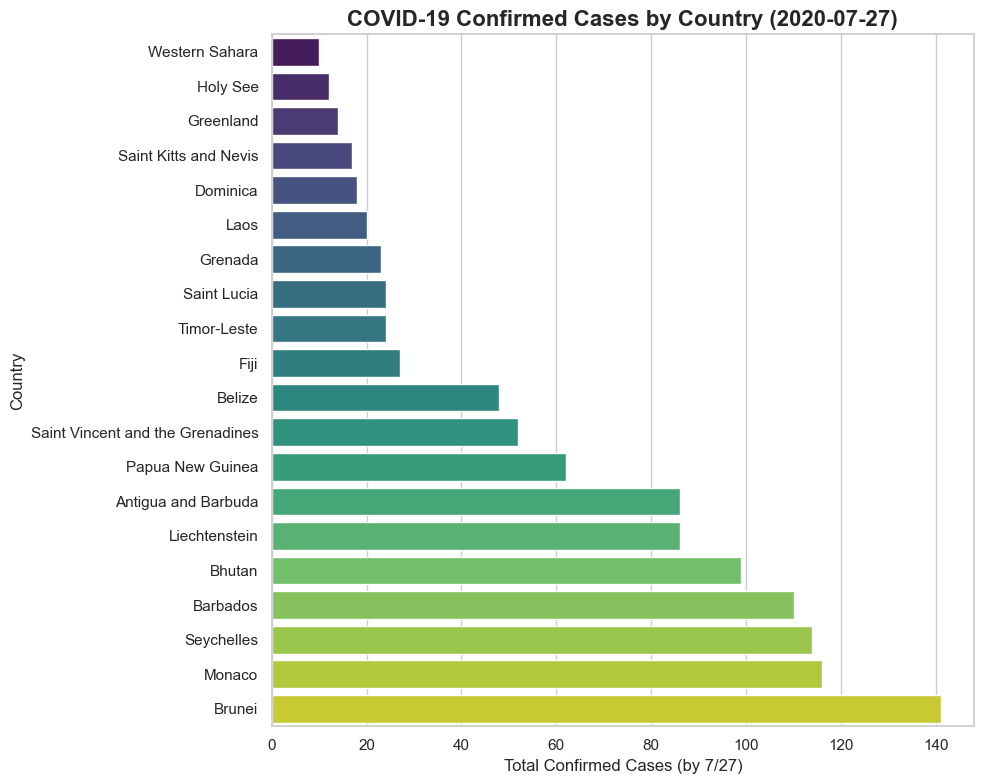

In [ ]:
#First convert a SQL query into a pd data frame
conn = sqlite3.connect("covid.db")
query = """
select
    Country,
    sum(Confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    total_confirmed asc
limit 20
"""
df = pd.read_sql(query, conn)
conn.close()

# Now graph the data
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    y="Country",               
    x="total_confirmed",
    hue="Country",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.xlabel("Total Confirmed Cases (by 7/27)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("COVID-19 Confirmed Cases by Country (2020-07-27)", fontsize=16, weight="bold")

plt.tight_layout()
plt.show()

It is interesting to see which countries have the fewest reported cases. For me, it is not surprising\
that isolated countries like Greenland or Fiji have such low numbers.\
Similarly, I am not surprised to see a small place like Holy See having a very small number of cases\
since their population is not very large to start with.